In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [37]:
q2 = "SELECT min(population), max(population),min(population_growth),max(population_growth) FROM facts "
pd.read_sql_query(q2, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [31]:
q3 = "SELECT * FROM facts where population == 0"
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [32]:
q4 = "SELECT * FROM facts where population == (SELECT max(population) FROM facts)"
pd.read_sql_query(q4, conn) 

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Nobody lives in Antarctica, and the largest 7 billion population is the combined population of the world

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E4E6C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8B35C0>]], dtype=object)

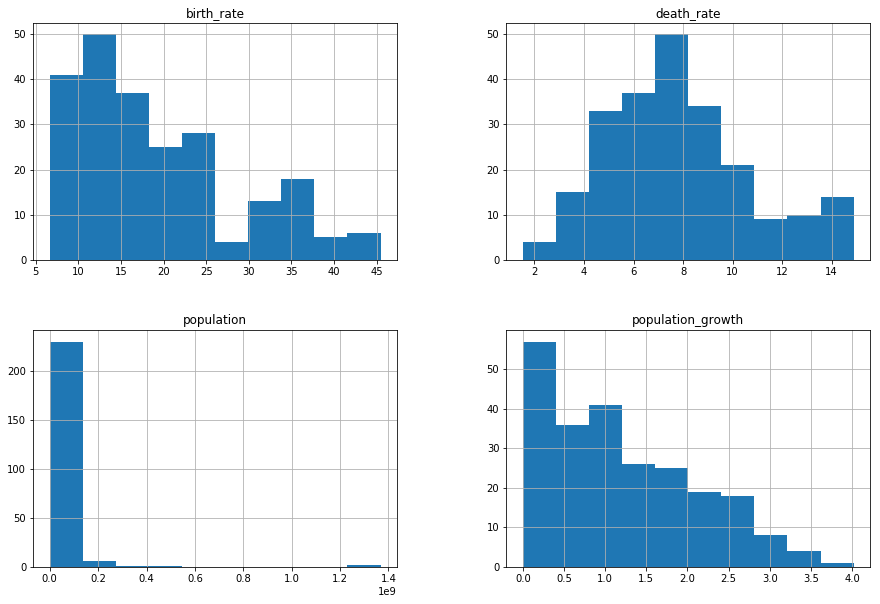

In [48]:
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(15,10))
axe = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts)
'''
pd.read_sql_query(q6, conn).hist(ax=axe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6185F8>]], dtype=object)

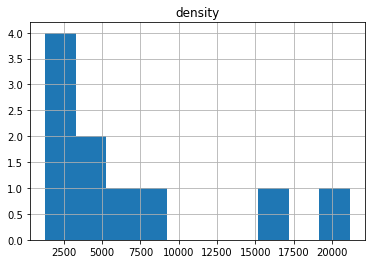

In [57]:
q7 = "SELECT name,(population/area) density FROM facts ORDER BY density DESC LIMIT 10"
pd.read_sql_query(q7, conn).hist()

In [63]:
q8 = "SELECT name,area_water,area_land, 1.0*area_water/area_land ratio FROM facts ORDER BY ratio DESC"
pd.read_sql_query(q8, conn)

,name,area_water,area_land,ratio
0,British Indian Ocean Territory,54340.0,60.0,905.666667
1,Virgin Islands,1564.0,346.0,4.520231
2,Puerto Rico,4921.0,8870.0,0.554791
3,"Bahamas, The",3870.0,10010.0,0.386613
4,Guinea-Bissau,8005.0,28120.0,0.284673
5,Malawi,24404.0,94080.0,0.259396
6,Netherlands,7650.0,33893.0,0.225710
7,Uganda,43938.0,197100.0,0.222922
8,Eritrea,16600.0,101000.0,0.164356
9,Liberia,15049.0,96320.0,0.156240
